In [10]:
include("BinaryMERA.jl")

expectation (generic function with 1 method)

In [41]:
include("OptimizeMERA.jl")

improveMERA! (generic function with 2 methods)

In [31]:
CHI = 8
INIT_LAYERS = 4

function build_H_Ising(h=1.0)
    X = [0 1; 1 0]
    Z = [1 0; 0 -1]
    I = eye(2)
    XX = kron(X,X)
    ZI = kron(Z,I)
    IZ = kron(I,Z)
    H2 = -(XX + h/2*(ZI+IZ))
    H = H2 / 3  # See below for an explanation of the 1/3.
    for n = 3:9
        eyen2 = eye(2^(n-2))
        # Terms at the borders of the blocks of three that get grouped together
        # need to be normalized differently from the ones that are within blocks.
        factor = (n == 4 || n == 7) ? 1/2 : 1/3
        H = kron(H, I) + kron(eyen2, H2)*factor
    end
    D, V = eig(Hermitian(H))
    D_max = D[end]
    # subtract largest eigenvalue, so that the spectrum is negative
    H = H - eye(2^9)*D_max
    H = reshape(H, (8,8,8,8,8,8))
    return H, D_max
end

isingH, D_max = build_H_Ising();

In [ ]:
m = generate_random_MERA(CHI,INIT_LAYERS);

In [56]:
parameters_init = Dict(:energyDelta => 1e-2 , :Qsweep => 10 , :Qlayer => 3, :Qsingle => 2);

In [48]:
# to ensure functions compiled
function runfunc(m, isingH, D_max, parameters_init)
    h_layer = improveMERA!(m, isingH, D_max, parameters_init);
    return h_layer
end

runfunc (generic function with 1 method)

In [57]:
Profile.clear()

In [50]:
runfunc(m, isingH, D_max, parameters_init);


Final energy of this optimized MERA: -2.675076150925067
Off from the exact answer by: 1.1009998958848626


In [58]:
@profile runfunc(m, isingH, D_max, parameters_init);

10 -- -5.126090139542531 -- 0.23802666954591534

Final energy of this optimized MERA: -5.126090139542531
Off from the exact answer by: 3.026021781006473


In [53]:
using ProfileView

INFO: Precompiling module ProfileView...
INFO: Precompiling module ProfileViewSVG...


before your program finished. To profile for longer runs, call Profile.init
with a larger buffer and/or larger delay.


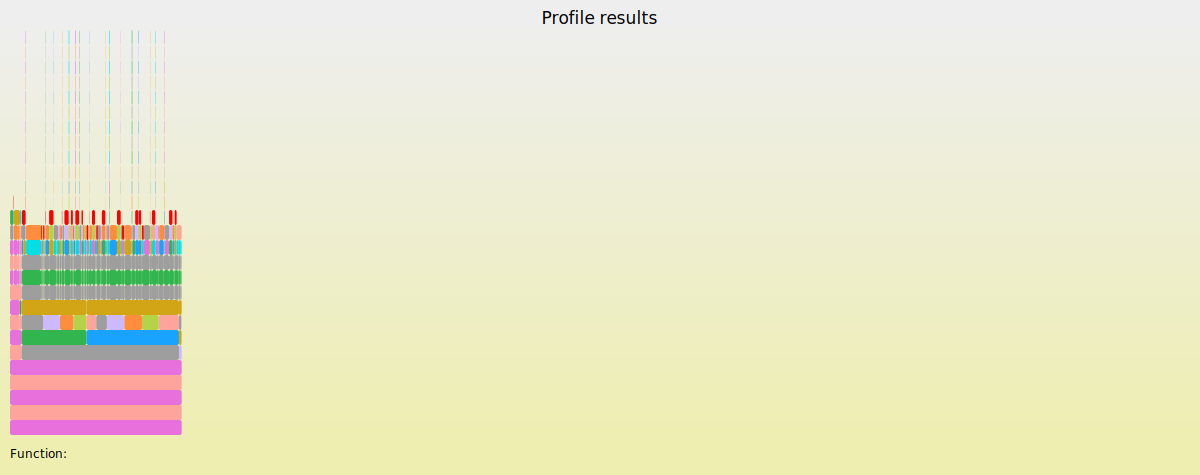

In [59]:
ProfileView.view()